In [1]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)



/Users/yk/.virtualenvs/cv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
digits = ds.load_digits()
X = digits.data
y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


In [11]:
len(y)

1797

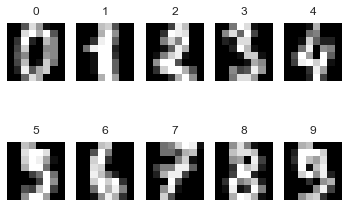

In [19]:
nrows, ncols = 2, 5
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])

In [21]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=0.25)
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knc.score(X_test, y_test)

0.98666666666666669

In [33]:
# この分類機が手書き文字を認識できるかテストする
one = np.zeros((8, 8))
one[1:-1, 4] = 16
one[2,3] = 16

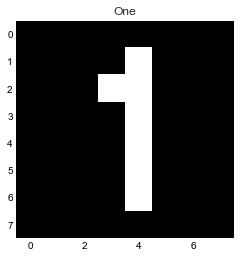

In [36]:
plt.imshow(one, interpolation='none')
plt.grid(False)
plt.xticks()
plt.yticks()
plt.title("One")

In [48]:
# knc.predict(one.ravel())
# predictは2D arrayで二次元配列で渡さないといけない、sklearn0.17からの仕様？
knc.predict(one.reshape(1,-1))

array([1])